In [32]:
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import pandas as pd

In [33]:
app_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')

In [34]:
app_data['Date'] = pd.to_datetime(app_data['Date'])
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


RangeIndex(start=0, stop=10998, step=1)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


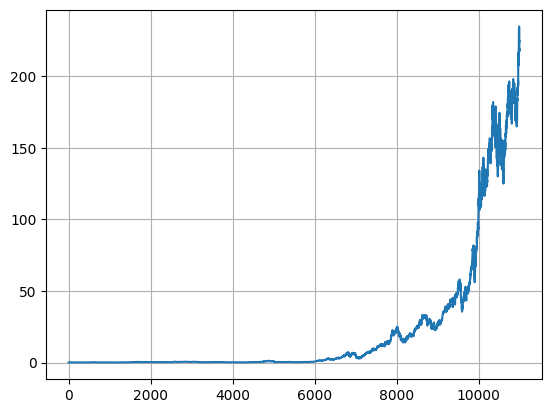

In [ ]:
print(app_data.index)

print(app_data.columns)

ts = app_data['Close'][-10:]

sample = app_data.sample(20)


app_data['Close'].plot(grid=True)

plt.show()

## Calculating RSI, Moving Average and Moving Average Convergence Divergence

In [37]:
# Ensure 'Date' is datetime and set as index if needed
app_data['Date'] = pd.to_datetime(app_data['Date'])
app_data.set_index('Date', inplace=True)

In [38]:
# Calculate Moving Averages
app_data['SMA_20'] = ta.SMA(app_data['Close'], timeperiod=20)
app_data['EMA_20'] = ta.EMA(app_data['Close'], timeperiod=20)
# Calculate RSI
app_data['RSI_14'] = ta.RSI(app_data['Close'], timeperiod=14)

# Calculate MACD
app_data['MACD'], app_data['MACD_signal'], app_data['MACD_hist'] = ta.MACD(
    app_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

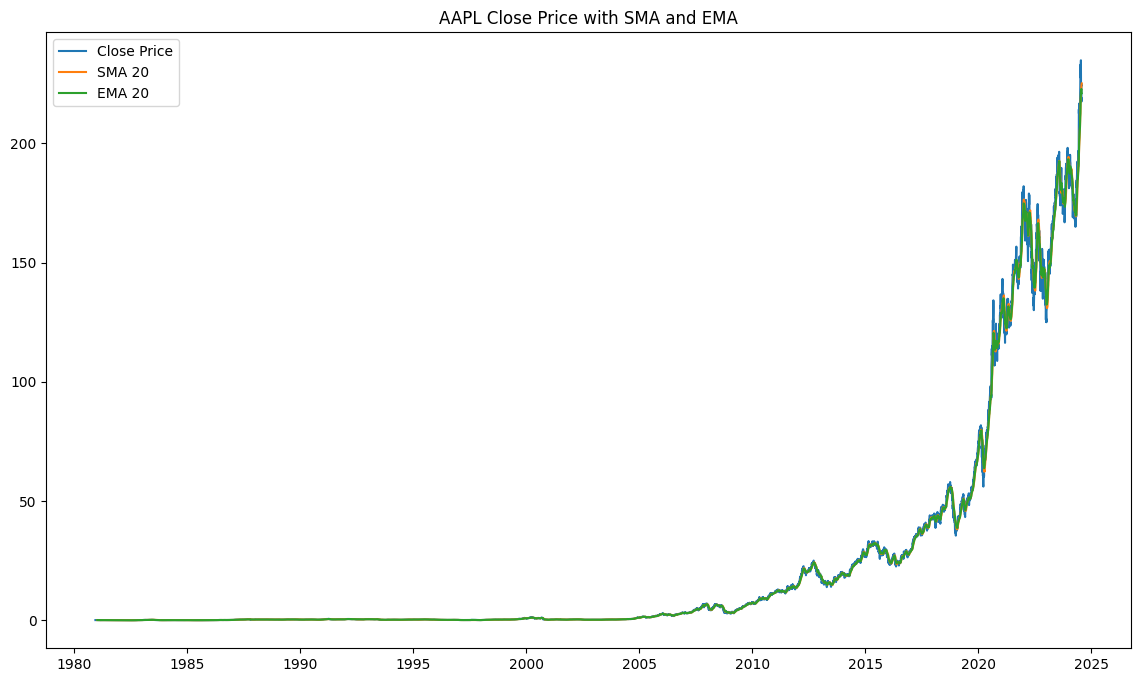

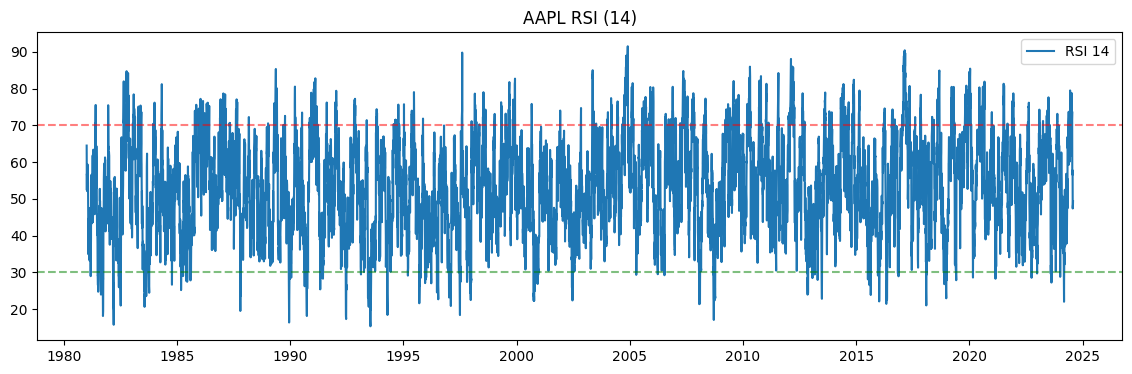

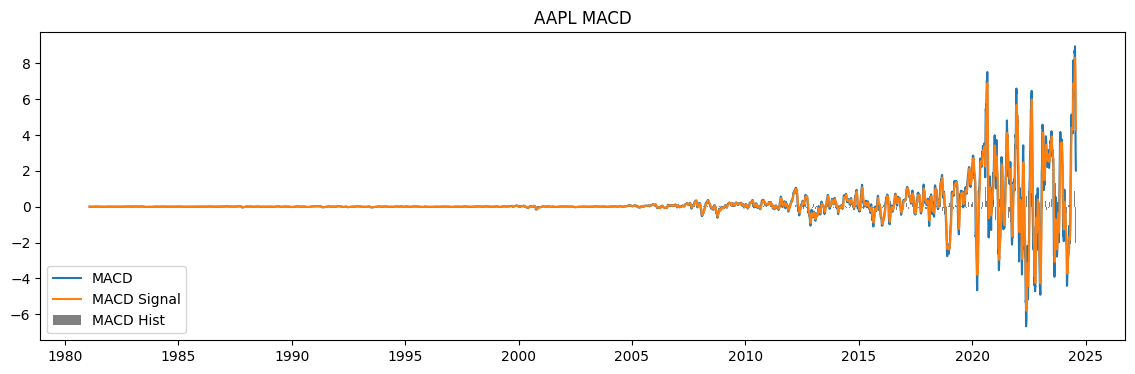

In [39]:
plt.figure(figsize=(14, 8))
plt.plot(app_data.index, app_data['Close'], label='Close Price')
plt.plot(app_data.index, app_data['SMA_20'], label='SMA 20')
plt.plot(app_data.index, app_data['EMA_20'], label='EMA 20')
plt.title('AAPL Close Price with SMA and EMA')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(app_data.index, app_data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AAPL RSI (14)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(app_data.index, app_data['MACD'], label='MACD')
plt.plot(app_data.index, app_data['MACD_signal'], label='MACD Signal')
plt.bar(app_data.index, app_data['MACD_hist'], label='MACD Hist', color='gray')
plt.title('AAPL MACD')
plt.legend()
plt.show()

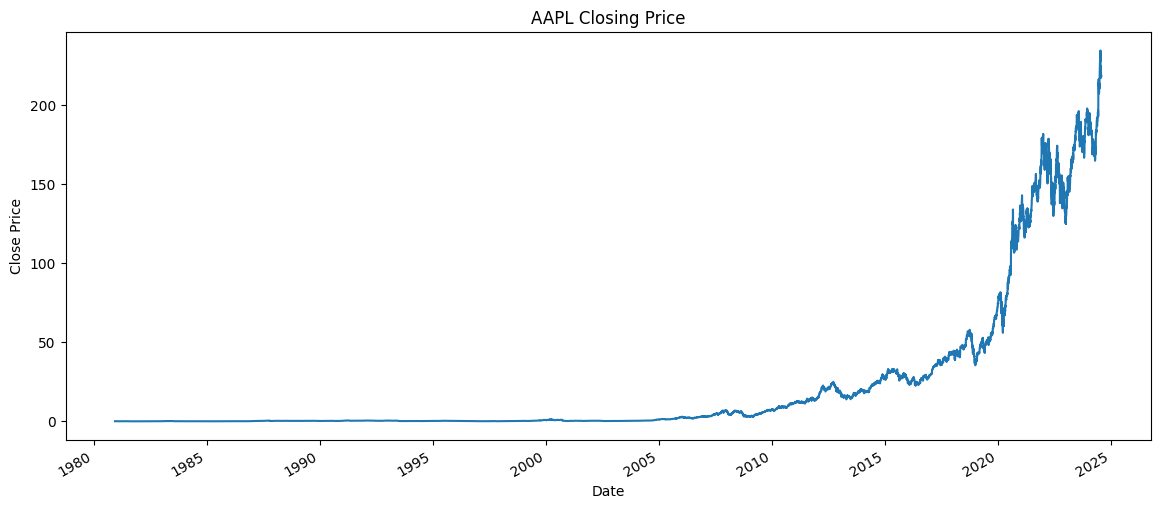

In [24]:
app_data['Close'].plot(figsize=(14,6), title='AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

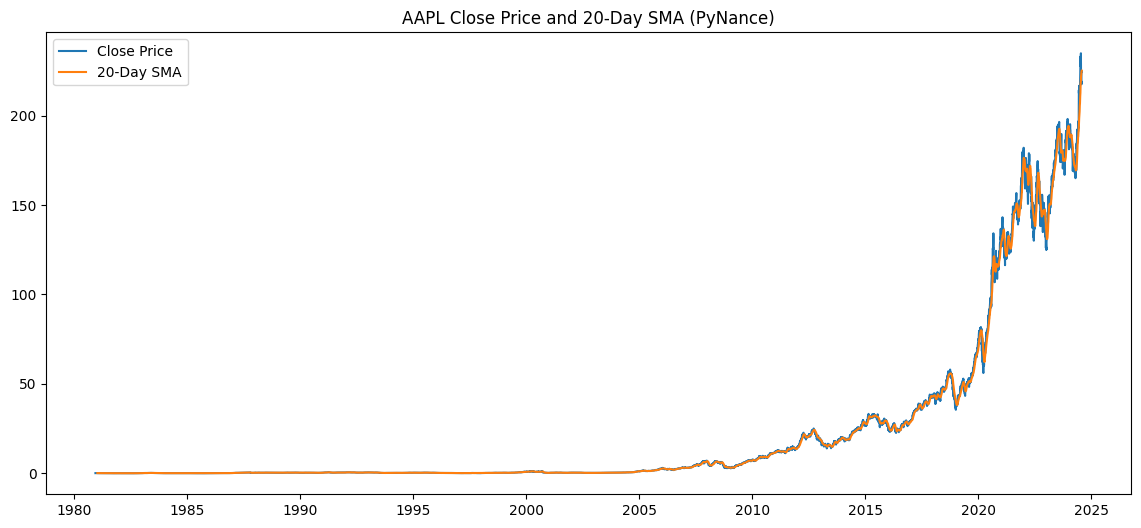

In [25]:
app_data['SMA_20'] = app_data['Close'].rolling(window=20).mean()
plt.figure(figsize=(14, 6))
plt.plot(app_data.index, app_data['Close'], label='Close Price')
plt.plot(app_data.index, app_data['SMA_20'], label='20-Day SMA')
plt.title('AAPL Close Price and 20-Day SMA (PyNance)')
plt.legend()
plt.show()

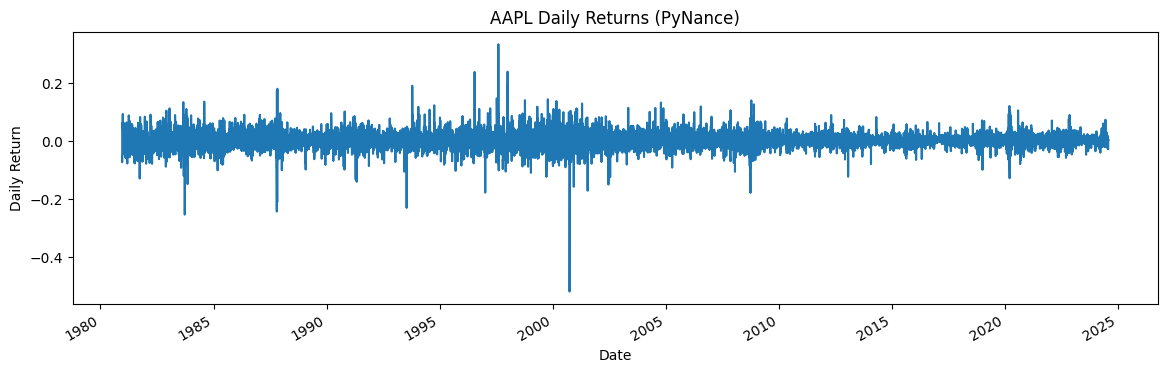

In [26]:
# Calculate daily returns and plot
app_data['daily_return'] = app_data['Close'].pct_change()
app_data['daily_return'].plot(figsize=(14, 4), title='AAPL Daily Returns (PyNance)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [41]:
# Assign `Adj Close` to `daily_close`
daily_close = app_data[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
1980-12-12   0.000000
1980-12-15  -0.052171
1980-12-16  -0.073398
1980-12-17   0.024751
1980-12-18   0.028992
...               ...
2024-07-24  -0.028754
2024-07-25  -0.004805
2024-07-26   0.002161
2024-07-29   0.001285
2024-07-30   0.002566

[10998 rows x 1 columns]
            Adj Close
Date                 
1980-12-12        NaN
1980-12-15  -0.053581
1980-12-16  -0.076231
1980-12-17   0.024449
1980-12-18   0.028580
...               ...
2024-07-24  -0.029176
2024-07-25  -0.004816
2024-07-26   0.002159
2024-07-29   0.001284
2024-07-30   0.002563

[10998 rows x 1 columns]


In [44]:
# Resample `aapl` to business months, take last observation as value 
monthly = app_data.resample('BME').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = app_data.resample("4ME").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

/tmp/ipykernel_72795/2543487281.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = app_data.resample('BME').apply(lambda x: x[-1])


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-04-30,-0.094185,-0.094089,-0.095811,-0.095811,-0.095811,-0.747477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-08-31,-0.033490,-0.033142,-0.033520,-0.033520,-0.033520,0.241629,NaN,NaN,-0.011328,-0.012463,-0.048582,-0.470790,-0.654432,-17.888259
1981-12-31,-0.289871,-0.288971,-0.289884,-0.289884,-0.289884,0.186656,NaN,NaN,-0.310924,-0.303168,0.036562,0.099055,1.205643,-2.048514
1982-04-30,-0.055217,-0.055726,-0.056022,-0.056022,-0.056022,0.384146,NaN,NaN,-0.021512,-0.031861,-0.104113,-0.095218,-0.456360,-1.569564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,0.037695,0.036328,0.045797,0.042774,0.044825,-0.260899,0.037037,NaN,-0.008251,-0.002387,0.332839,-1.972190,-1.981768,-1.929756
2023-08-31,0.206826,0.201202,0.207676,0.202303,0.204646,-0.121052,0.965622,NaN,0.221832,0.216188,0.002650,0.011977,0.381526,-1.716827
2023-12-31,0.001787,0.001928,0.001536,0.002550,0.004377,-0.010061,-0.481928,NaN,0.002407,0.006408,-0.077927,-0.618024,-0.769814,-1.986574


In [45]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
1980-12-12        NaN
1980-12-15  -0.052171
1980-12-16  -0.073398
1980-12-17   0.024751
1980-12-18   0.028992
...               ...
2024-07-24  -0.028754
2024-07-25  -0.004805
2024-07-26   0.002161
2024-07-29   0.001285
2024-07-30   0.002566

[10998 rows x 1 columns]


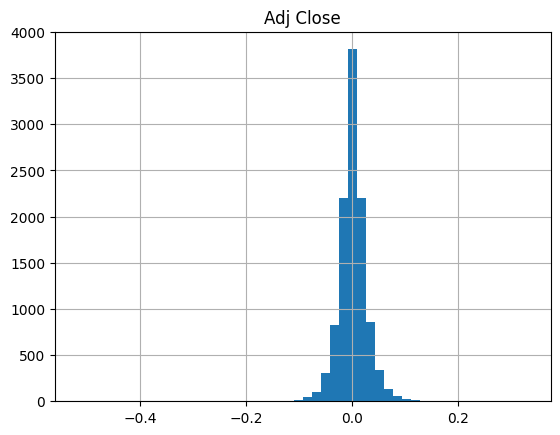

          Adj Close
count  10997.000000
mean       0.001096
std        0.027892
min       -0.518692
25%       -0.012674
50%        0.000000
75%        0.014451
max        0.332281


In [46]:
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [47]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

              Adj Close
Date                   
1980-12-12          NaN
1980-12-15     0.947829
1980-12-16     0.878261
1980-12-17     0.899999
1980-12-18     0.926091
...                 ...
2024-07-24  2206.187813
2024-07-25  2195.588126
2024-07-26  2200.332786
2024-07-29  2203.159441
2024-07-30  2208.812751

[10998 rows x 1 columns]


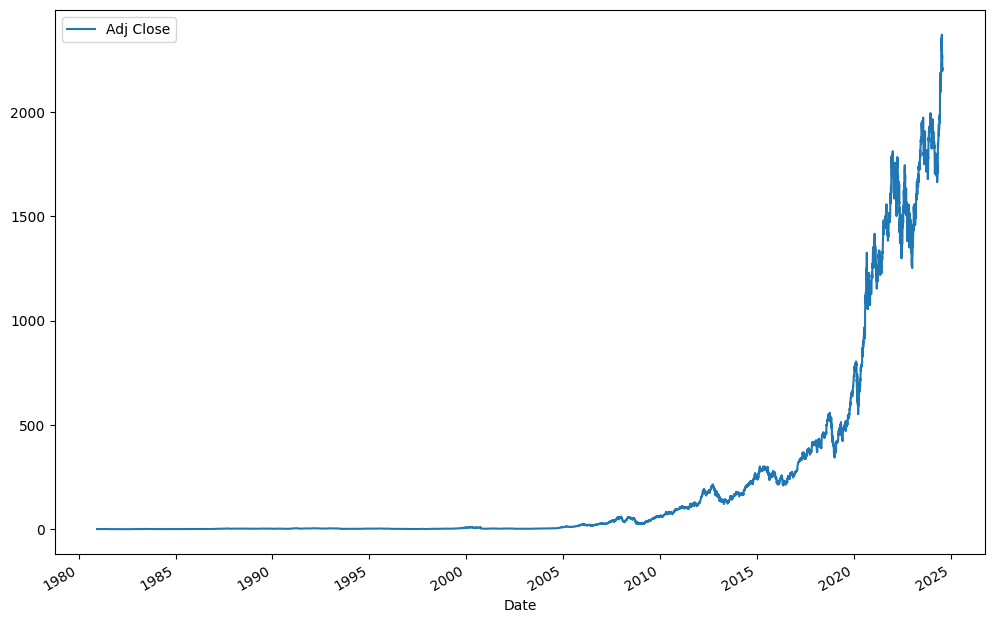

In [48]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()